# Machine Learning Engineer Nanodegree
## Investment and Trading Capstone Project Proposal
## Project: Build a Stock Price Indicator

## Getting Started

Machine-learning has found its application in many different areas of finance. It has been applied to spot unusual patterns of transactions, which can indicate fraud. It has been applied in the document-heavy parts of finance, where AI-based systems can be used to recognize text. It is also good at automating financial decisions, like assessing creditworthiness or eligibility for an insurance policy. The newest frontier for machine-learning is in trading, where it is used both to analyze market data and to select and trade portfolios of securities.  This project will utilize machine-learning in this area to build a stock price indicator. 

The problem to be solved in this project is to accurately predict the future closing value of a given stock across a given period of time in the future. One potential solution is to utilize deep learning methods to predict the future value. This model can be trained using the historical data of different stocks, and the predicted value can be compared with the actual value of these stocks. The percentage difference between the predicted value and the actual value can be used to calculate the accuracy of the model.

This project will use open source historical stock price data from Yahoo! Finance. Yahoo finance provides a relatively simple process of obtaining basic financial information. Information available includes financial statements and price and volume data. CSV files can be obtained through its website about the data, and web API is available. 


## Exploring the Data

Load necessary Python libraries and load the data. I have chosen 10 different stocks and downloaded the historical data for 10 years. These stocks include a wide range of banks, tech companies, index and hotels.

In [215]:
# Import libraries necessary for this project
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the Apple stock dataset
AAPLData = pd.read_csv("AAPL.csv")
# Success - Display the 10 record
AAPLData.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2006-11-01,11.585714,11.625714,11.194285,11.308572,10.173827,152798100
1,2006-11-02,11.274285,11.331429,11.214286,11.282857,10.150690,116370800
2,2006-11-03,11.337143,11.361428,11.112857,11.184286,10.062012,107972200
3,2006-11-06,11.278571,11.437143,11.204286,11.387143,10.244513,108644200
4,2006-11-07,11.492857,11.571428,11.447143,11.501429,10.347329,131483100


### Implementation: Data Exploration
A cursory investigation of the dataset will give a sense of how the data is like

In [216]:
#statistics calculated
AAPLData.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2769.000000,2769.000000,2769.000000,2769.000000,2769.000000,2.769000e+03
mean,67.239402,67.849310,66.571378,67.228947,63.430790,1.258370e+08
std,41.893997,42.162775,41.621215,41.902836,41.545765,9.921908e+07
min,11.164286,11.331429,10.967143,11.171429,10.050444,1.147590e+07
25%,26.578571,26.814285,26.121429,26.500000,23.840887,5.191570e+07
50%,62.704285,63.512856,62.028572,62.808571,57.449242,1.003660e+08
75%,100.290001,101.089996,99.250000,100.410004,96.162788,1.683752e+08
max,167.899994,169.649994,166.940002,169.039993,169.039993,8.432424e+08


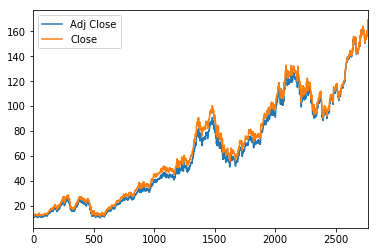

In [217]:
# plot the closing price over time
cloPri=AAPLData[['Adj Close','Close']]
cloPri.plot()
plt.show()

In [218]:
# look into other stock data:
##join multiple stock data:

#Read Stock data 
def readStocks(symbols,dates):
    #create empty dataframe:
    df1=pd.DataFrame(index=dates)
    for symbol in symbols:
        dfStock=pd.read_csv("{}.csv".format(symbol),index_col='Date',parse_dates=True, usecols=['Date','Adj Close'],na_values=['nan'])
        dfStock=dfStock.rename(columns={'Adj Close':symbol})
        #join dataset together:
        df1=df1.join(dfStock,how='inner')
    return df1

In [219]:
dates=pd.date_range('2010-10-31','2017-10-31')
dfStocks=readStocks(['SPY','AMZN','DPZ'],dates)

#### Plot the stocks on the same graph

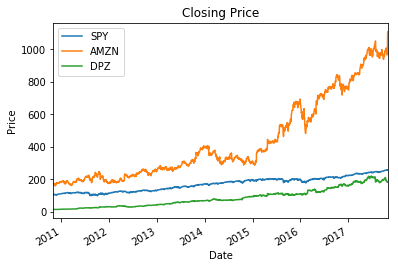

In [220]:
#plot these stock data together:
def plotStocks(df,title):
    ax=df.plot(title=title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.show()

plotStocks(dfStocks,'Closing Price')

In [221]:
def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    dfTemp=df.loc[start_index:end_index,columns]
    #normalize data
    dfTemp=dfTemp/dfTemp.iloc[0,:]
    ax=dfTemp.plot(title='Selected Data')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.show()



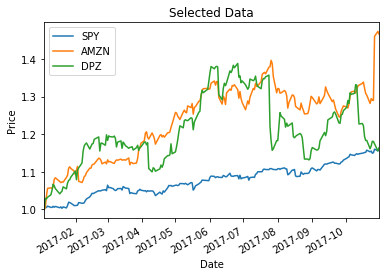

SPY     239.341428
AMZN    931.891048
DPZ     190.138568
dtype: float64

In [222]:
#Explore the data a little bit:
plot_selected(dfStocks,['SPY','AMZN','DPZ'],'2017-01-01','2017-10-31')
#calculate the mean of the stock for this year
dfStocks.loc['2017-01-01':'2017-10-31',:].mean()

In [223]:
#calculate standard deviation for the volitility of the stock
dfStocks.loc['2017-01-01':'2017-10-31',:].std()

SPY      9.045985
AMZN    73.182246
DPZ     14.094605
dtype: float64

#### Explore the Rollinger Bands

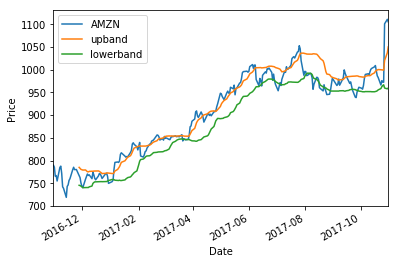

In [224]:
### If stock price is out of rollinger bands, then it presents a buying or selling opportunity
ax=dfStocks.loc['2016-10-31':'2017-10-31','AMZN'].plot(label='AMZN')
rm_AMZN=dfStocks.loc['2016-10-31':'2017-10-31','AMZN'].rolling(window=20,center=False).mean()
rs_AMZN=dfStocks.loc['2016-10-31':'2017-10-31','AMZN'].rolling(window=20,center=False).std()
(rm_AMZN+rs_AMZN).plot(label='upband',ax=ax)
(rm_AMZN-rs_AMZN).plot(label='lowerband',ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
plt.show()



#### Explore the cumulative returns of SPY and a certain stock

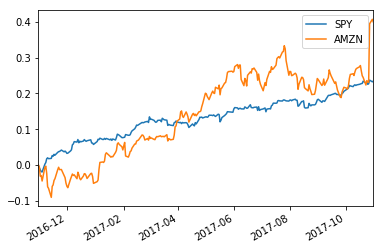

In [225]:
### Daily return tells important information about stock performance
def compute_cuReturns(df):
    dReturns=df.copy()
    dReturns=dReturns/dReturns[0]-1
    return dReturns
dRSPY=compute_cuReturns(dfStocks.loc['2016-10-31':'2017-10-31','SPY'])
dRAMZN=compute_cuReturns(dfStocks.loc['2016-10-31':'2017-10-31','AMZN'])
ax=dRSPY.plot()
dRAMZN.plot(ax=ax)
ax.legend()
plt.show()

##### From the graph it can be seen that AMZN returns spikes at the end of October 2017, while it underperformed at the end of 2016

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. For this dataset, the stock price might be missing for holidays or certain days. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

In [226]:
dates=pd.date_range('2006-10-31','2017-10-31')
stickers=['SPY','AMZN','DPZ','IHG','MSFT','C','EBAY','DIS','GOOG','AAPL']
dfStocks=readStocks(stickers,dates)

In [227]:
dfStocks.head()

,SPY,AMZN,DPZ,IHG,MSFT,C,EBAY,DIS,GOOG,AAPL
2006-11-01,108.977386,37.560001,13.628567,21.336660,22.193466,436.957855,13.228114,26.596134,232.239502,10.173827
2006-11-02,108.913704,37.450001,13.384657,21.380911,22.162653,438.191162,13.695286,26.570990,233.436722,10.150690
2006-11-03,108.722549,37.459999,13.201723,21.502575,22.131840,436.869812,13.632154,26.730242,234.375610,10.062012
2006-11-06,109.948830,38.209999,13.684464,22.044571,22.216583,442.419891,13.783670,27.208019,236.933975,10.244513
2006-11-07,110.370811,38.770000,13.699708,22.387455,22.301319,444.710388,13.699495,27.534922,234.758118,10.347329


### Shuffle and Split Data
Now all stock closing prices have been converted into numerical features. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

With time series predictions, it's crucial to avoid random splitting, and do it in a chronological fashion, so that testing data information does not leak into training process. For example, if the price of a stock on July 14th and July 16th are in training, and July 15th is in testing, it's going to be really easy for the model to interpolate and guess the 15th perfectly, because it has "seen the future". 

#### In this part, AAPL data will be examined. A week's data will be used to predict the closing price 3 days later.

In [228]:
#features will be closing data for a week:
data_aapl=dfStocks['AAPL'].to_frame(name = 'Day0')

for i in range(1,7):
    data_temp=dfStocks['AAPL'].shift(-i)
    data_aapl=data_aapl.join(data_temp.to_frame(name='Day{}'.format(i)), how='inner')

#last collumn is price after 3 days:    
data_temp=dfStocks['AAPL'].shift(-9)
data_aapl=data_aapl.join(data_temp.to_frame(name='Day{}'.format('9')), how='inner')
data_aapl=data_aapl.dropna()

In [229]:
#split into features and price
price_final=data_aapl['Day9']
features_final=data_aapl.drop('Day9', axis = 1)

In [230]:
features_final.head()

,Day0,Day1,Day2,Day3,Day4,Day5,Day6
2006-11-01,10.173827,10.150690,10.062012,10.244513,10.347329,10.596662,10.711047
2006-11-02,10.150690,10.062012,10.244513,10.347329,10.596662,10.711047,10.682772
2006-11-03,10.062012,10.244513,10.347329,10.596662,10.711047,10.682772,10.840854
2006-11-06,10.244513,10.347329,10.596662,10.711047,10.682772,10.840854,10.924394
2006-11-07,10.347329,10.596662,10.711047,10.682772,10.840854,10.924394,10.802297


In [231]:
price_final.head()

2006-11-01    10.924394
2006-11-02    10.802297
2006-11-03    11.002795
2006-11-06    11.033639
2006-11-07    11.113322
Name: Day9, dtype: float64

In [232]:
#for financial data, random split is not appropiate:
def split_data(X,y):
    #for financial data, random split is not appropiate:
    split_point=int(np.floor(len(y)*0.8))
    #print "Training set has {} samples.".format(split_point)
    #print "Testing set has {} samples.".format(len(price_final)-split_point)
    X_train=X[:split_point]
    X_test=X[split_point:]
    y_train=y[:split_point]
    y_test=y[split_point:]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test=split_data(features_final,price_final)

----
## Evaluating Model Performance
In this section, we will investigate different algorithms, and determine which is best at modeling the data. One of the algorithms is known as a *naive predictor*, which will be the benchmark predictor.

In [233]:
#one naive predictor is to use the data of the first Day and the last Day to predict the stock price
# use a linear model

In [234]:
def naive_predictor0(X_test):
    #features will be closing data for a week:
    data_spy=dfStocks['SPY']
    p1=data_spy.iloc[0]
    p2=data_spy.iloc[-1]
    increase_rate=(p2-p1)/p1/len(data_spy)
    price1=X_test['Day0']
    return price1*(1+increase_rate*9)
price_predict0=naive_predictor0(X_test)

In [235]:
# Evaluate Model using RMS error:
def ERMS_cal(y_predict,y_test):
    errors=(y_predict-y_test)/y_test
    ##root mean square error:
    ERMS=((errors**2).mean())**0.5
    return ERMS

print('The testing error using the naive predictor is {}'.format(ERMS_cal(price_predict0,y_test)))

The testing error using the naive predictor is 0.0422909816167


In [236]:
y_pred_train0=naive_predictor0(X_train)
print('The training error (root mean square error) using the naive predictor is {}'.format(ERMS_cal(y_pred_train0,y_train)))

The training error (root mean square error) using the naive predictor is 0.0665010977116


#####  Use linear regression to predict the price

In [294]:
from sklearn import  linear_model
def pred_Linear(X_train, y_train, X_test):
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_test)
    return y_pred

y_pred1=pred_Linear(X_train, y_train, X_test)

In [295]:
print('The testing error (root mean square error) using the linear regression predictor is {}'.format(ERMS_cal(y_pred1,y_test)))

The testing error (root mean square error) using the linear regression predictor is 0.0248579168131


In [296]:
#also report the training error:
y_pred_train1=pred_Linear(X_train, y_train, X_train)
print('The training eroor (root mean square error) using the naive predictor is {}'.format(ERMS_cal(y_pred_train1,y_train)))

The training eroor (root mean square error) using the naive predictor is 0.037196822104


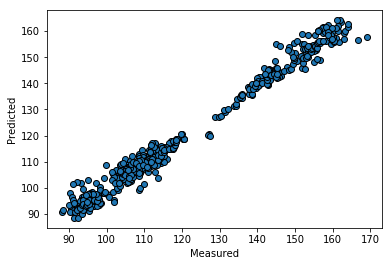

In [297]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred1, edgecolors=(0, 0, 0))
#ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

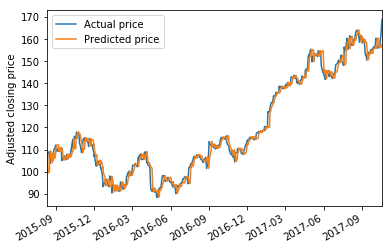

In [303]:
##Freeform visualization:
ax=y_test.plot(label='Actual price')
ax.set_ylabel('Adjusted closing price')
predicted_price=pd.Series(data=y_pred1, index=y_test.index)
predicted_price.plot(ax=ax,label='Predicted price')
ax.legend()
plt.show()

In [241]:
## test model on other stocks:
def compile_data(sticker):
    data_sticker=dfStocks[sticker].to_frame(name = 'Day0')

    for i in range(1,7):
        data_temp=dfStocks[sticker].shift(-i)
        data_sticker=data_sticker.join(data_temp.to_frame(name='Day{}'.format(i)), how='inner')

    #last collumn is price after 3 days:    
    data_temp=dfStocks[sticker].shift(-9)
    data_sticker=data_sticker.join(data_temp.to_frame(name='Day{}'.format('9')), how='inner')
    data_sticker=data_sticker.dropna()
    #split into features and price
    price_final=data_sticker['Day9']
    features_final=data_sticker.drop('Day9', axis = 1)
    X_train, X_test, y_train, y_test=split_data(features_final,price_final)
    return X_train, X_test, y_train, y_test
    




In [267]:
ErrorNaive=[]
ErrorLinear=[]
for sticker in stickers:
    X_train, X_test, y_train, y_test= compile_data(sticker)
    y_2=pred_Linear(X_train, y_train, X_test)
    y_1=naive_predictor0(X_test)
    ErrorNaive.append(ERMS_cal(y_1,y_test))
    ErrorLinear.append(ERMS_cal(y_2,y_test))

In [268]:
Error_compare=pd.DataFrame(data={'Naive':ErrorNaive,'Linear':ErrorLinear},index=stickers)
Error_compare

,Linear,Naive
SPY,0.012889,0.021630
AMZN,0.030492,0.048409
DPZ,0.029084,0.050179
IHG,0.026133,0.044699
MSFT,0.022796,0.036328
C,0.030422,0.050711
EBAY,0.028697,0.048482
DIS,0.018621,0.032386
GOOG,0.022760,0.035692
AAPL,0.024858,0.042291


In [270]:
Error_compare.describe()

,Linear,Naive
count,10.000000,10.000000
mean,0.024675,0.041081
std,0.005651,0.009452
min,0.012889,0.021630
25%,0.022769,0.035851
50%,0.025495,0.043495
75%,0.028987,0.048464
max,0.030492,0.050711


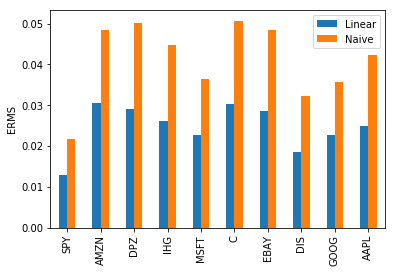

In [244]:
ax=Error.plot.bar()
ax.set_ylabel('ERMS')
plt.show()

#####  Use KNN regression to predict the price

In [245]:
from sklearn.neighbors import KNeighborsRegressor
def pred_KNN(X_train, y_train, X_test, n):
    neigh = KNeighborsRegressor(n_neighbors=n)
    neigh.fit(X_train, y_train)
    y_pred=neigh.predict(X_test)
    y_pred=pd.Series(data=y_pred, index=X_test.index)
    return y_pred

In [246]:
X_train, X_test, y_train, y_test= compile_data('AAPL')
y_pred2=pred_KNN(X_train, y_train, X_test, 5)
print('KNN gives root mean squared error is {}'.format(ERMS_cal(y_pred2,y_test)))

KNN gives root mean squared error is 0.104814245323


In [247]:
#also report the training error:
y_pred_train2=pred_KNN(X_train, y_train, X_train,5)
print('The training eroor (root mean square error) using the kNN predictor is {}'.format(ERMS_cal(y_pred_train2,y_train)))

The training eroor (root mean square error) using the kNN predictor is 0.0310635688547


----
## Refinement: improving Results
In this final section, a search optimization will be performed for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter.

In [248]:
# A improvement for the naive predictor using individual stock price rather than SPY
def naive_predictor(X_test):
    p1=X_test['Day0']
    p2=X_test['Day6']
    y_pred=(p2-p1)/6*9+p1
    return y_pred

price_predict=naive_predictor(X_test)

In [249]:
print('The root mean square error using the naive predictor is {}'.format(ERMS_cal(price_predict,y_test)))

The root mean square error using the naive predictor is 0.0303040548241


In [250]:
#Refinement for linear regression

In [251]:
# one parameter that can be tuned is the number of days used in the training set:
def compile_data_Nday(sticker,dates,N):
    stickers=['SPY','AMZN','DPZ','IHG','MSFT','C','EBAY','DIS','GOOG','AAPL']
    dfStocks=readStocks(stickers,dates)
    data_sticker=dfStocks[sticker].to_frame(name = 'Day0')

    for i in range(1,N):
        data_temp=dfStocks[sticker].shift(-i)
        data_sticker=data_sticker.join(data_temp.to_frame(name='Day{}'.format(i)), how='inner')

    #last collumn is price after 3 days: 
    estimate_day=N+2
    data_temp=dfStocks[sticker].shift(-estimate_day)
    data_sticker=data_sticker.join(data_temp.to_frame(name='Day{}'.format(estimate_day)), how='inner')
    data_sticker=data_sticker.dropna()
    #split into features and price
    price_final=data_sticker['Day{}'.format(estimate_day)]
    features_final=data_sticker.drop('Day{}'.format(estimate_day), axis = 1)
    X_train, X_test, y_train, y_test=split_data(features_final,price_final)
    return X_train, X_test, y_train, y_test


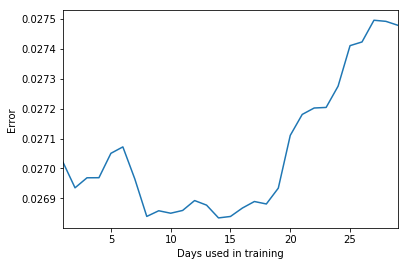

In [252]:
ErrorDay=[]
train_days=list(range(1,30))
dates=pd.date_range('2006-10-31','2014-10-31')
for N in train_days:
    X_tr, X_cross, y_tr, y_cross= compile_data_Nday('AAPL',dates,N)
    # split training data into train and cross_validation data:
    #X_tr, X_cross, y_tr, y_cross=split_data(X_train,y_train)
    y_pre=pred_Linear(X_tr, y_tr, X_cross)
    ErrorDay.append(ERMS_cal(y_pre,y_cross))

Error=pd.Series(data=ErrorDay, index=train_days)
ax=Error.plot()
ax.set_ylabel('Error')
ax.set_xlabel('Days used in training')
plt.show()

In [253]:
dates=pd.date_range('2006-10-31','2017-10-31')
X_train, X_test, y_train, y_test= compile_data_Nday('AAPL',dates,14)
y_pre3=pred_Linear(X_train, y_train, X_test)
print('The testing error using the improved linear predictor is {}'.format(ERMS_cal(y_pre3,y_test)))

The testing error using the improved linear predictor is 0.0248567425769


In [254]:
#training error:
y_pre_train3=pred_Linear(X_train, y_train, X_train)
print('The training error using the improved linear predictor is {}'.format(ERMS_cal(y_pre_train3,y_train)))

The training error using the improved linear predictor is 0.0373639215996


In [255]:
# How many days the predicted day is away from the training date can also be important:
def compile_data_nday(sticker,dates,n):
    stickers=['SPY','AMZN','DPZ','IHG','MSFT','C','EBAY','DIS','GOOG','AAPL']
    dfStocks=readStocks(stickers,dates)
    data_sticker=dfStocks[sticker].to_frame(name = 'Day0')

    for i in range(1,7):
        data_temp=dfStocks[sticker].shift(-i)
        data_sticker=data_sticker.join(data_temp.to_frame(name='Day{}'.format(i)), how='inner')

    #last collumn is price after n days: 
    estimate_day=7+n-1
    data_temp=dfStocks[sticker].shift(-estimate_day)
    data_sticker=data_sticker.join(data_temp.to_frame(name='Day{}'.format(estimate_day)), how='inner')
    data_sticker=data_sticker.dropna()
    #split into features and price
    price_final=data_sticker['Day{}'.format(estimate_day)]
    features_final=data_sticker.drop('Day{}'.format(estimate_day), axis = 1)
    X_train, X_test, y_train, y_test=split_data(features_final,price_final)
    return X_train, X_test, y_train, y_test



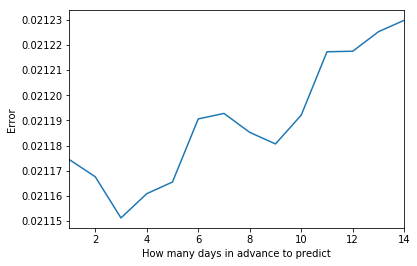

In [256]:
ErrorDay=[]
train_days=list(range(1,15))
dates=pd.date_range('2010-10-31','2017-10-31')
for N in train_days:
    X_train, X_test, y_train, y_test= compile_data_Nday('AAPL',dates,N)
    # split training data into train and cross_validation data:
    #X_tr, X_cross, y_tr, y_cross=split_data(X_train,y_train)
    y_pre=pred_Linear(X_train, y_train, X_test)
    ErrorDay.append(ERMS_cal(y_pre,y_test))

Error=pd.Series(data=ErrorDay, index=train_days)
ax=Error.plot()
ax.set_ylabel('Error')
ax.set_xlabel('How many days in advance to predict')
plt.show()

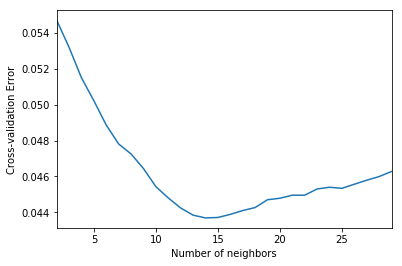

In [257]:
## refinement of KNN: changing n_neighbors
X_tr, X_cross, y_tr, y_cross=split_data(X_train,y_train)
N=range(2,30)
Errors=[]
for n in N:
    y_pred1=pred_KNN(X_tr, y_tr, X_cross, n)
    Errors.append(ERMS_cal(y_pred1,y_cross))
Errors=pd.Series(data=Errors,index=N)


ax=Errors.plot()
ax.set_xlabel('Number of neighbors')
ax.set_ylabel('Cross-validation Error')
plt.show()

In [258]:
X_train, X_test, y_train, y_test= compile_data('AAPL')
y_pred4=pred_KNN(X_train, y_train, X_test, 14)
print('improved KNN gives training error is {}'.format(ERMS_cal(y_pred4,y_test)))

improved KNN gives training error is 0.106027696716


In [259]:
y_pred4_train=pred_KNN(X_train, y_train, X_train, 14)
print('Improved KNN gives training error is {}'.format(ERMS_cal(y_pred4_train,y_train)))

Improved KNN gives training error is 0.0367234382077
